In [27]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
#source('tests.R')
#source('cleanup.R')

In [28]:
redwine <- read_delim("data/winequality-red.csv", delim = ";")
redwine

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


In [29]:
good_redwine <- redwine %>%
    filter(quality > 5) %>%
    mutate(quality = "good")
bad_redwine <- redwine %>%
    filter(quality <= 5) %>%
    mutate(quality = "bad") 
redwine_new <- rbind(good_redwine, bad_redwine)
redwine_new

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


In [30]:
redwine_newfct <- mutate(redwine_new, quality = as_factor(quality))
redwine_newfct
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) %>%
        set_engine("kknn") %>%
        set_mode("classification")

redwine_recipe <- recipe(quality ~ pH, data = redwine_newfct) %>%
        step_scale(all_predictors()) %>%
        step_center(all_predictors())

redwine_fit <- workflow() %>%
        add_recipe(redwine_recipe) %>%
        add_model(knn_spec) %>%
        fit(data = redwine_newfct)

new_wine <- tibble(pH = 3.6)
wine_predict <- predict(redwine_fit, new_wine)
wine_predict

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,good
7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,good
7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,good
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.725,0.20,7.8,0.073,29,79,0.99770,3.29,0.54,9.2,bad
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,bad
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,bad


.pred_class
<fct>
good


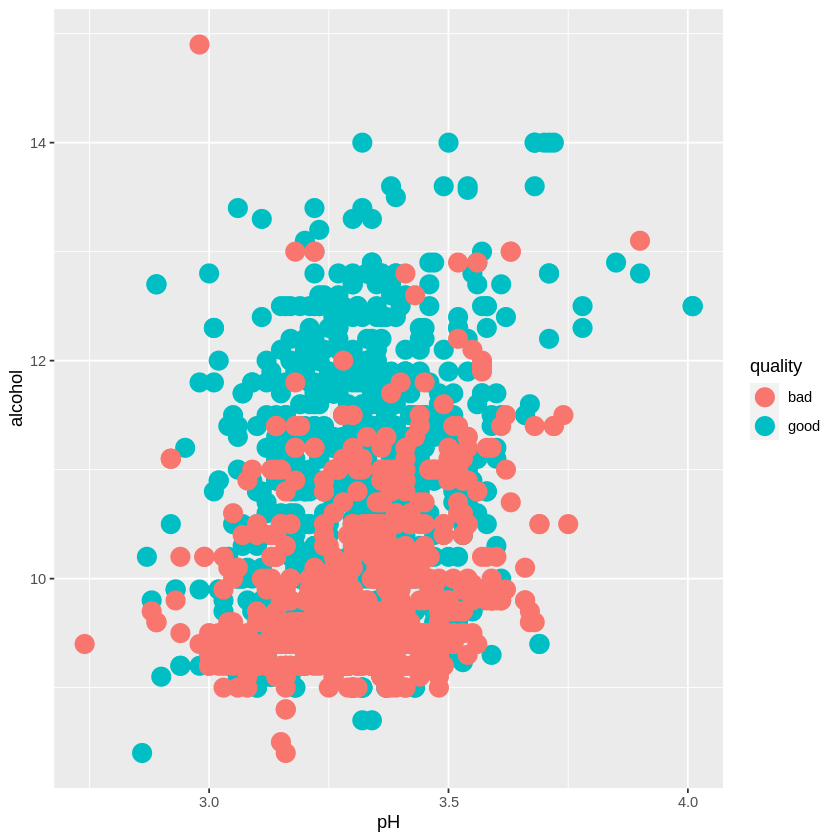

In [31]:
plot <- ggplot(redwine_new, aes(x = pH, y = alcohol, color = quality)) +
    geom_point(size = 5)
plot